<a href="https://colab.research.google.com/github/Abo3adel/Elevvo_first_task-Student-Score-Prediction-/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import  train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import MinMaxScaler as mms , StandardScaler as ss

In [2]:
from google.colab import files
uploaded = files.upload()

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


In [3]:
df= pd.read_csv('StudentPerformanceFactors.csv')
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

columns need to treat:Teacher_Quality ,Parental_Education_Level ,Distance_from_Home

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


All numerical data don't have outliars

In [6]:
df["Teacher_Quality"].value_counts()

,count
Teacher_Quality,
Medium,3925
High,1947
Low,657


In [7]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [8]:
df['Teacher_Quality'] = df.groupby('School_Type')['Teacher_Quality'] \
                          .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))


In [9]:
df["Teacher_Quality"].value_counts()

,count
Teacher_Quality,
Medium,4003
High,1947
Low,657


In [10]:
df["Teacher_Quality"].isnull().sum()

np.int64(0)

In [11]:
null_per = (df["Parental_Education_Level"].isnull().sum() / len(df)) * 100
null_per

np.float64(1.362191614953837)

In [12]:
df = df.dropna(subset=['Parental_Education_Level'])

In [13]:
df["Parental_Education_Level"].isnull().sum()

np.int64(0)

In [14]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [15]:
null_per = (df["Distance_from_Home"].isnull().sum() / len(df)) * 100
null_per

np.float64(1.0280804050943686)

In [16]:
df = df.dropna(subset=['Distance_from_Home'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6450 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6450 non-null   int64 
 1   Attendance                  6450 non-null   int64 
 2   Parental_Involvement        6450 non-null   object
 3   Access_to_Resources         6450 non-null   object
 4   Extracurricular_Activities  6450 non-null   object
 5   Sleep_Hours                 6450 non-null   int64 
 6   Previous_Scores             6450 non-null   int64 
 7   Motivation_Level            6450 non-null   object
 8   Internet_Access             6450 non-null   object
 9   Tutoring_Sessions           6450 non-null   int64 
 10  Family_Income               6450 non-null   object
 11  Teacher_Quality             6450 non-null   object
 12  School_Type                 6450 non-null   object
 13  Peer_Influence              6450 non-null   object
 1

In [18]:
df['Good_Sleep'] = df['Sleep_Hours'].apply(
    lambda x: 1 if 6 <= x <= 9 else 0
)

In [19]:
df['Sleep_Hours'].value_counts()

,count
Sleep_Hours,
7,1699
8,1369
6,1338
9,760
5,678
10,307
4,299


In [20]:
df['Hours_Studied'].value_counts()

,count
Hours_Studied,
20,455
19,430
21,424
22,395
18,394
23,391
17,372
24,346
16,341


In [21]:
bins = [0, 10, 20, float("inf")]
labels = ["Low", "Medium", "High"]

df['Study_Level'] = pd.cut(df['Hours_Studied'], bins=bins, labels=labels, right=False)


In [22]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score', 'Good_Sleep', 'Study_Level'],
      dtype='object')

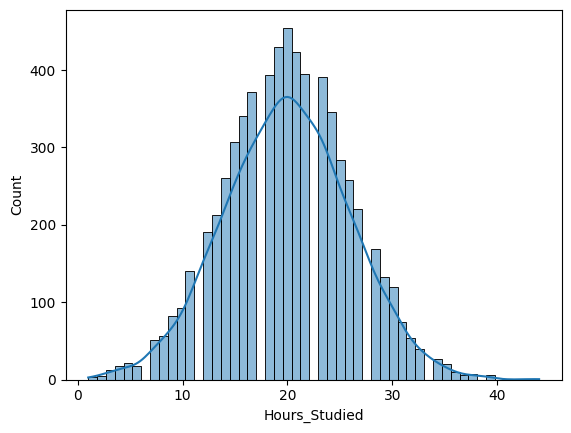

In [49]:
sns.histplot(df['Hours_Studied'],kde=True)
plt.show()

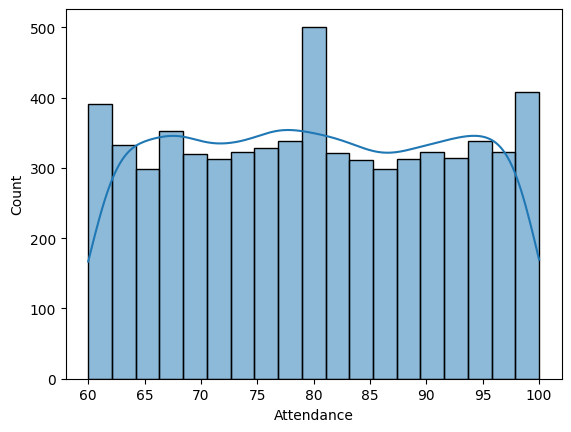

In [50]:
sns.histplot(df['Attendance'],kde=True)
plt.show()

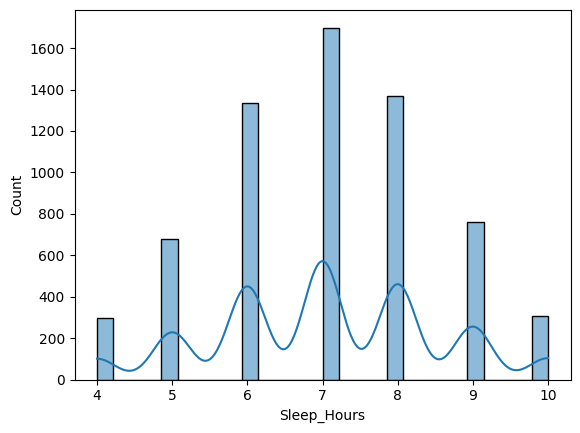

In [52]:
sns.histplot(df['Sleep_Hours'],kde=True)
plt.show()

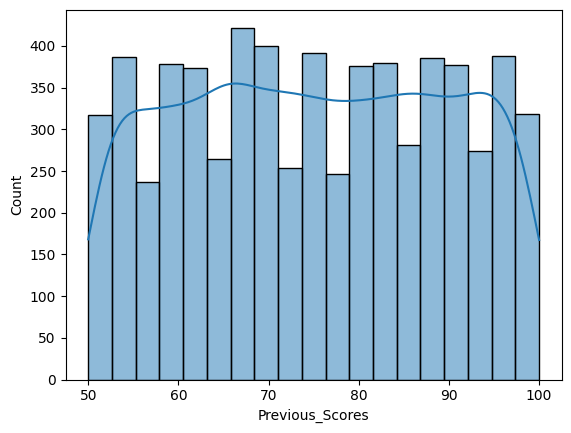

In [51]:
sns.histplot(df['Previous_Scores'],kde=True)
plt.show()

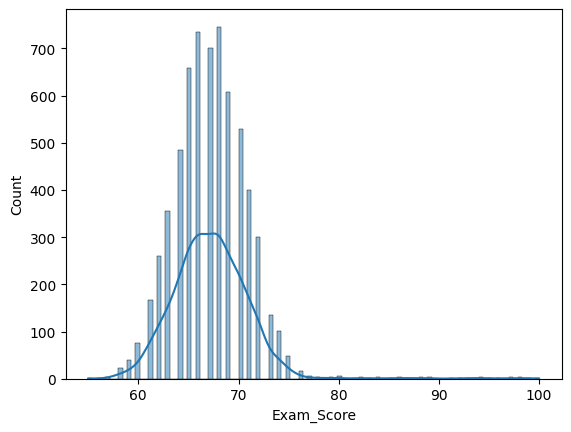

In [53]:
sns.histplot(df['Exam_Score'],kde=True)
plt.show()

In [47]:
df = df[df['Exam_Score']<=100]

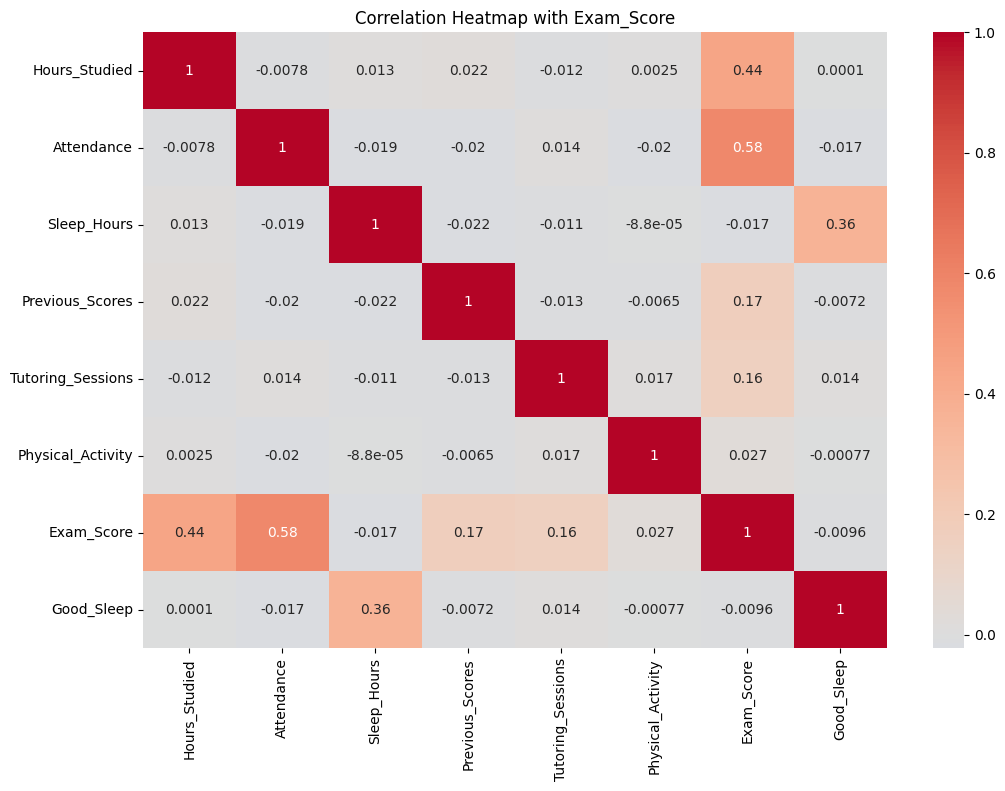

In [23]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap with Exam_Score")
plt.show()

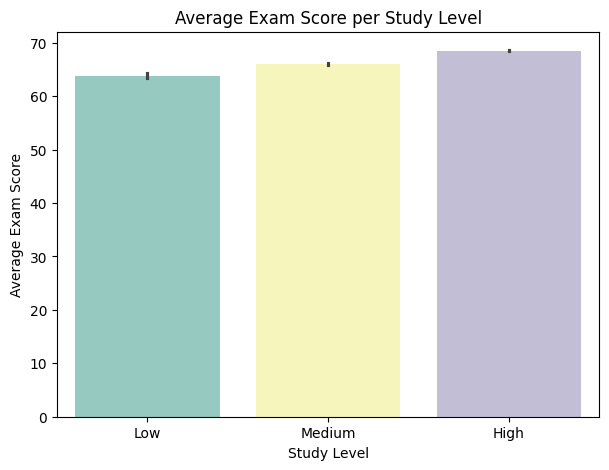

In [24]:
plt.figure(figsize=(7,5))
sns.barplot(x='Study_Level', y='Exam_Score', data=df, estimator=lambda x: sum(x)/len(x), palette='Set3')
plt.title("Average Exam Score per Study Level")
plt.xlabel("Study Level")
plt.ylabel("Average Exam Score")
plt.show()

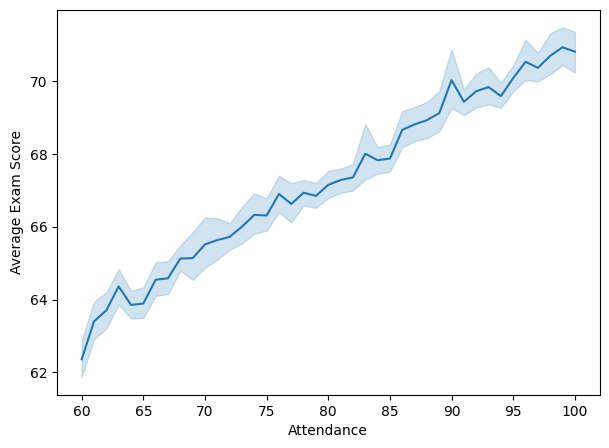

In [25]:
plt.figure(figsize=(7,5))
sns.lineplot(x='Attendance', y='Exam_Score', data=df, estimator=lambda x: sum(x)/len(x), palette='Set3')
plt.xlabel("Attendance")
plt.ylabel("Average Exam Score")
plt.show()

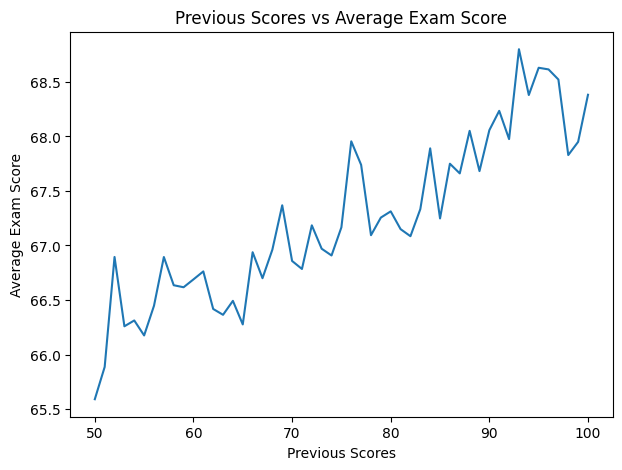

In [26]:
plt.figure(figsize=(7,5))
sns.lineplot(x='Previous_Scores', y='Exam_Score', data=df, estimator='mean', ci=None)
plt.xlabel("Previous Scores")
plt.ylabel("Average Exam Score")
plt.title("Previous Scores vs Average Exam Score")
plt.show()

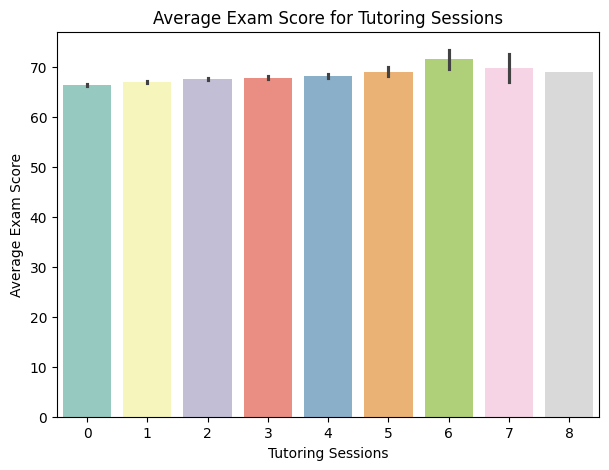

In [27]:
plt.figure(figsize=(7,5))
sns.barplot(x='Tutoring_Sessions', y='Exam_Score', data=df, estimator=lambda x: sum(x)/len(x), palette='Set3')
plt.title("Average Exam Score for Tutoring Sessions")
plt.xlabel("Tutoring Sessions")
plt.ylabel("Average Exam Score")
plt.show()

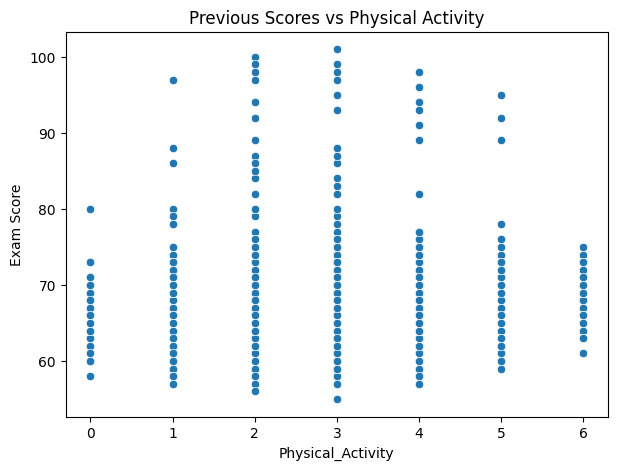

In [28]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Physical_Activity', y='Exam_Score', data=df, palette='Set3')
plt.xlabel("Physical_Activity")
plt.ylabel("Exam Score")
plt.title("Previous Scores vs Physical Activity")
plt.show()

train a model with the most effective features

In [29]:
most_effictive_features=["Hours_Studied","Attendance","Previous_Scores","Tutoring_Sessions","Physical_Activity"]
X=df[most_effictive_features]
y=df["Exam_Score"]

In [30]:
x_norm=mms().fit_transform(X)
y_norm=mms().fit_transform(y.values.reshape(-1,1))
X_train , X_test , y_train , y_test = tts(x_norm,y_norm,test_size=0.2,random_state=42)

In [31]:
model = lr()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
MSE = mse(y_test, y_pred)
print("Mean Squared Error:", MSE)

Mean Squared Error: 0.003727002940832488


In [33]:
y_pred=y_pred.flatten()
y_pred

array([0.26240311, 0.35307382, 0.14344603, ..., 0.2963354 , 0.34411133,
       0.24376939])

In [34]:
y_test=y_test.flatten()
y_test

array([0.30434783, 0.41304348, 0.15217391, ..., 0.32608696, 0.39130435,
       0.26086957])

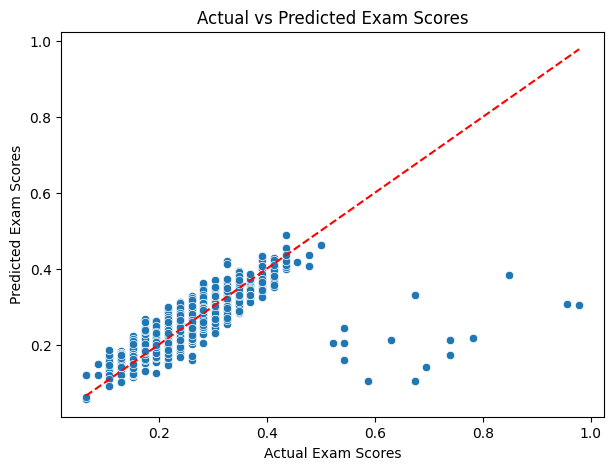

In [35]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

train a model with all features

In [36]:
X = df[numeric_cols]
y = df['Exam_Score']

In [37]:
x_norm=mms().fit_transform(X)
y_norm=mms().fit_transform(y.values.reshape(-1,1))
X_train , X_test , y_train , y_test = tts(x_norm,y_norm,test_size=0.2,random_state=42)

In [38]:
model = lr()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
MSE2 = mse(y_test, y_pred)
print("Mean Squared Error:", MSE2)

Mean Squared Error: 2.1913051750964072e-32


In [40]:
y_pred=y_pred.flatten()
y_pred

array([0.30434783, 0.41304348, 0.15217391, ..., 0.32608696, 0.39130435,
       0.26086957])

In [41]:
y_test=y_test.flatten()
y_test

array([0.30434783, 0.41304348, 0.15217391, ..., 0.32608696, 0.39130435,
       0.26086957])

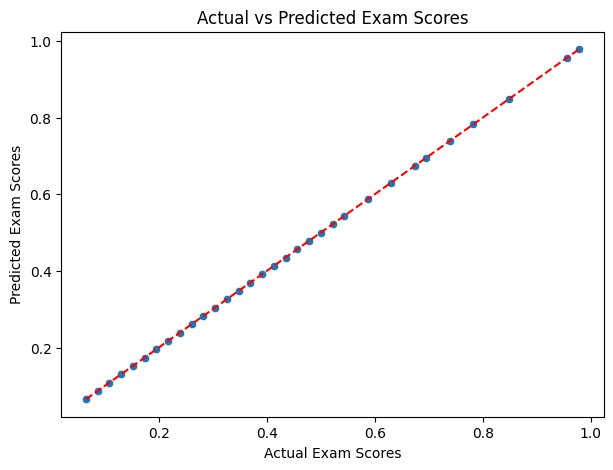

In [42]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()